In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
# dtype = torch.float
# #device = torch.device("cpu")
# device = torch.device("cuda:0")
# torch.set_default_tensor_type('torch.cuda.FloatTensor')
import NeuralNetwork as NN
import Layer
import importlib
import time
from IPython.display import display
from ipywidgets import FloatProgress

importlib.reload(NN)
importlib.reload(Layer);

In [71]:
net = NN.NeuralNetwork()
l = Layer.InputPELayer(n=2)
net.AddLayer(l)
#net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.TopPELayer(n=2))

In [72]:
net.SetIdentityWeights()
for i in range(0, len(net.layers)-1):
    net.M[i] += torch.normal( mean=torch.zeros_like(net.M[i]) )/2.
    net.W[i] += torch.normal( mean=torch.zeros_like(net.W[i]) )/2.

In [73]:
def RandomSample():
    amp = 0.5
    x = (2.*np.random.rand() - 1)*amp
    y = (2.*np.random.rand() - 1)*amp
    return [[x, y], [0.5*y, -2.0*x]] #np.array([x, y], dtype=np.float64)

In [74]:
net.learning_tau = 2.
epochs = 300
fp = FloatProgress(min=0,max=epochs)  
display(fp)
T = 3
start_time = time.time()
for k in range(epochs):
    [x, y] = RandomSample()
    net.Infer(T, x, y)
    fp.value += 1
end_time = time.time()
print('Total time: '+str(end_time-start_time))

FloatProgress(value=0.0, max=300.0)

Total time: 41.64657998085022


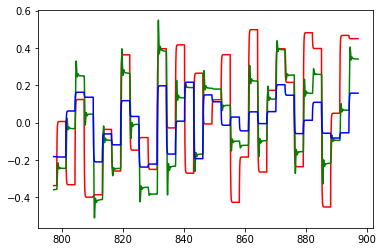

In [75]:
lastn = -10*1000
#lastn = 0
plt.plot(np.array(net.t_history[lastn:]), np.array(net.layers[0].v_history)[lastn:,0], 'r',
         np.array(net.t_history[lastn:]), np.array(net.layers[1].v_history)[lastn:,0], 'g',
         np.array(net.t_history[lastn:]), np.array(net.layers[2].v_history)[lastn:,0], 'b');

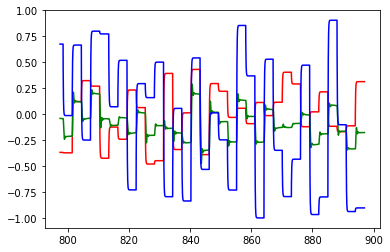

In [76]:
plt.plot(np.array(net.t_history[lastn:]), np.array(net.layers[0].v_history)[lastn:,1], 'r',
         np.array(net.t_history[lastn:]), np.array(net.layers[1].v_history)[lastn:,1], 'g',
         np.array(net.t_history[lastn:]), np.array(net.layers[2].v_history)[lastn:,1], 'b');

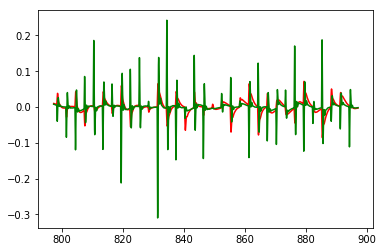

In [77]:
plt.plot(np.array(net.t_history[lastn:]), np.array(net.layers[0].e_history)[lastn:,0], 'r',
         np.array(net.t_history[lastn:]), np.array(net.layers[1].e_history)[lastn:,0], 'g');
#plt.ylim([-0.01,0.01])

In [78]:
# Test the feedback (generative) performance
beta = 0. # 1 for FF, 0 for FB
inf_layer = -1 if beta==1 else 0
n_trials = 20
x_true = []
x_est = []
T = 10.
for trial in range(n_trials):
    [x, y] = RandomSample()
    if beta==1:
        x_true.append(np.array(y))
        y = net.Predict(T, x)
        x_est.append(np.array(y))
    else:
        x_true.append(np.array(x))
        x = net.Generate(T, y)
        x_est.append(np.array(x))
x_true = np.array(x_true)
x_est = np.array(x_est)

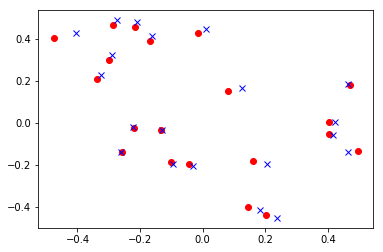

In [79]:
plt.plot(x_true[:,0], x_true[:,1], 'ro', x_est[:,0], x_est[:,1], 'bx');

In [80]:
net.ShowState()
net.ShowWeights()

Layer 0 (input):
  v = [-0.09563477 -0.19459014]
  e = [ 7.088380e-07 -2.663199e-07]
Layer 1:
  v = [-0.16938904 -0.08702093]
  e = [ 4.6329731e-08 -1.0737072e-06]
Layer 2 (expectation):
  v = [-0.09380499  0.20216286]
  W01 = 
[[ 0.7248142   1.3057966 ]
 [-0.23447697  1.2841501 ]]
  M10 = 
[[ 0.82661057 -1.5867802 ]
 [ 1.16185     0.7739623 ]]
  W12 = 
[[0.5976122  0.52987295]
 [0.314711   0.01847702]]
  M21 = 
[[ 1.3802322  -0.18215695]
 [ 0.6970216   0.28636768]]
